In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [12]:
# Importing the necessary libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

### Import the Data
Let's extract the our **Titanic data** from the .csv file, create a  pandas DataFrame and look at the available indicators:

- ***Survived***: Outcome of survival (0 = No; 1 = Yes)
- ***Pclass***: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- ***Name***: Name of passenger
- ***Sex***: Sex of the passenger
- ***Age***: Age of the passenger (Some entries contain NaN)
- ***SibSp***: Number of siblings and spouses of the passenger aboard
- ***Parch***: Number of parents and children of the passenger aboard
- ***Ticket***: Ticket number of the passenger
- ***Fare***: Fare paid by the passenger
- ***Cabin***: Cabin number of the passenger (Some entries contain NaN)
- ***Embarked***: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

In [24]:
# Load the dataset
df = pd.read_csv('/content/titanic_dataset.csv')
#percent_to_use = 0.20
#df = df.sample(frac=percent_to_use, random_state=42)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
df.shape

(891, 12)

In [26]:
# Identify the categorical data
categorical_features = ['Sex', 'Embarked', 'Pclass']

In [ ]:
df.hist(column='Survived')

[Go back to the Table of Contents](#table_of_contents)
** **
<a id = "Distribution"></a>
## 2. Distribution plots
Distribution of data is the foremost thing that we need to understand while analysing the data. Here, we will see how seaborn helps us in understanding the distribution of our data.

<a id = "distplot"></a>
### 2.1. distplot
The `distplot()` function provides the most convenient way to take a quick look at univariate distribution. This function will plot a `histogram` that fits the **kernel density estimation(KDE)** of the data.

Now let's plot the histogram of **Number of parents and children of the passenger aboard(parch)**.


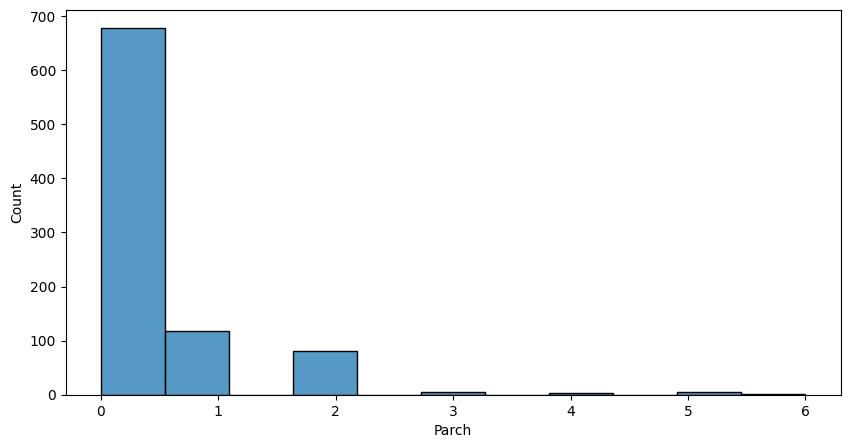

In [36]:
sns.histplot(df['Parch'],kde=False)
plt.show()

As we can see, most passengers don't have neither parents nor children aboard.
<a id = "kdeplot"></a>
### 2.2. kdeplot
***Kernel Density Estimation (KDE)*** is a way to estimate the probability density function of a continuous random variable. It is used for ***non-parametric*** analysis. Setting the `hist` flag to False in `distplot` will yield the KDE plot. For bivariate distribution, we can plot a kde by using `jointplot()`. Pass value `‘kde’` to the parameter `kind` to plot kernel plot.

**Note:** `distplot(data)` is used to visualize the ***parametric distribution*** of data. It plot both KDE and histogram on the same figure.

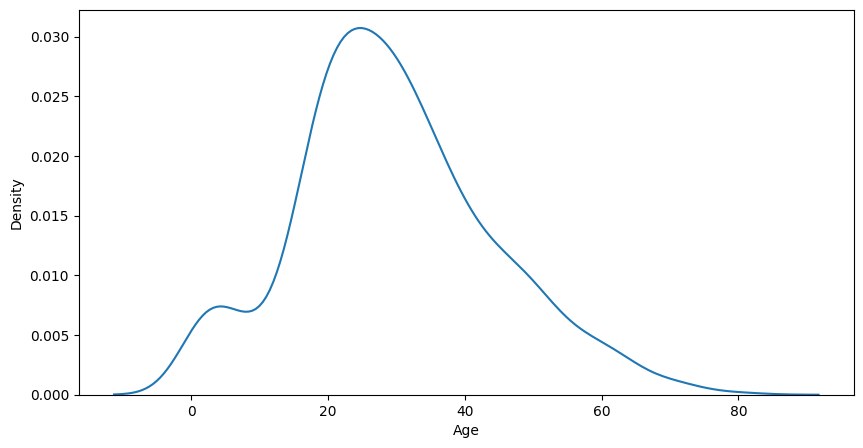

In [38]:
sns.distplot(df['Age'], hist=False)
plt.show()

As we can see that most of the passenger has the age between 20 to 40

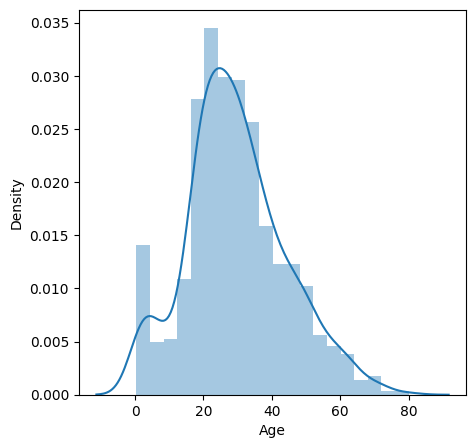

In [41]:
plt.figure(figsize=(5,5))
sns.distplot(df['Age'])
plt.show()

[Go back to the Table of Contents](#table_of_contents)
** **
<a id = "Relational"></a>
## 3. Relational plots

<a id = "relplot"></a>
### 3.1. relplot
Figure-level interface for drawing relational plots onto a FacetGrid.

The function `relplot()` is named that way because it is designed to visualize many different statistical relationships. While scatter plots are a highly effective way of doing this, relationships where one variable represents a measure of time are better represented by a line. The `relplot()` function has a convenient `kind` parameter to let you easily switch to this alternate representation.


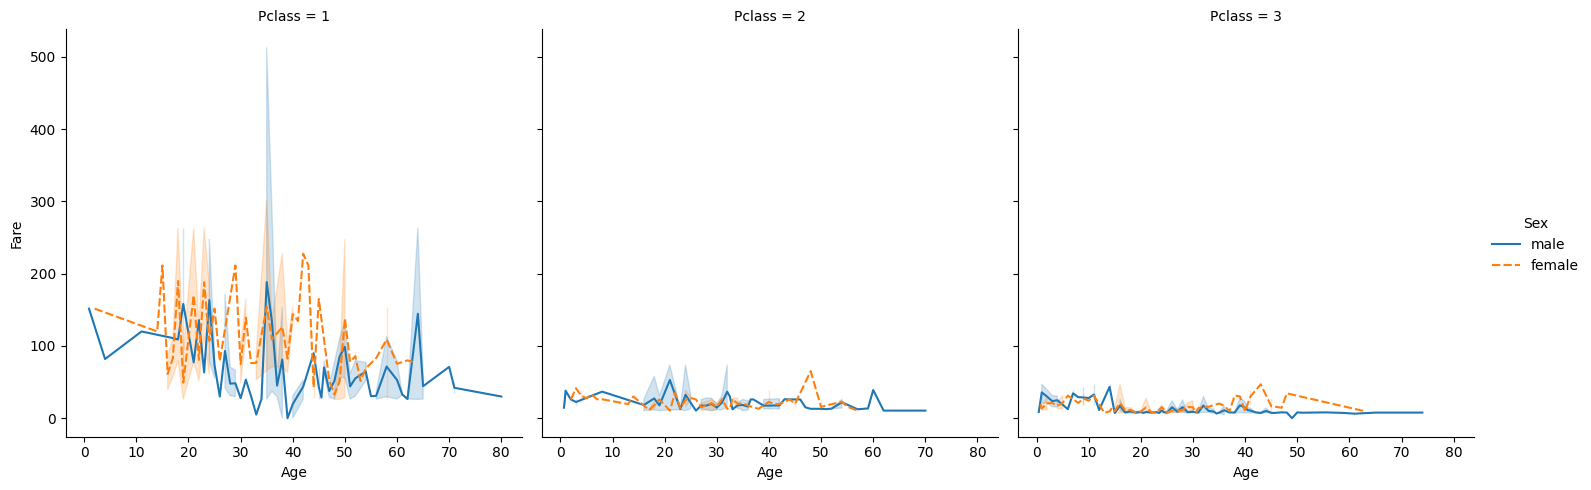

In [43]:
sns.relplot(x="Age", y="Fare", col="Pclass", hue="Sex", style="Sex",kind="line", data=df) # scatter can be used instead of "line" plot
plt.show()

<a id = "scatterplot"></a>
###  scatterplot
**Scatter plot** is the most convenient way to visualize the distribution where each observation is represented in two -dimensional plot via x and y axis.

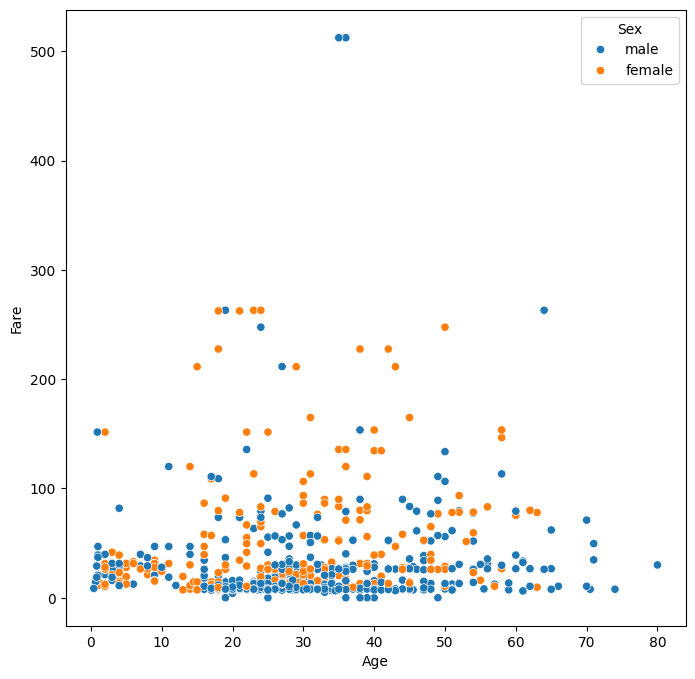

In [45]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Age", y="Fare", hue="Sex", data=df)
plt.show()

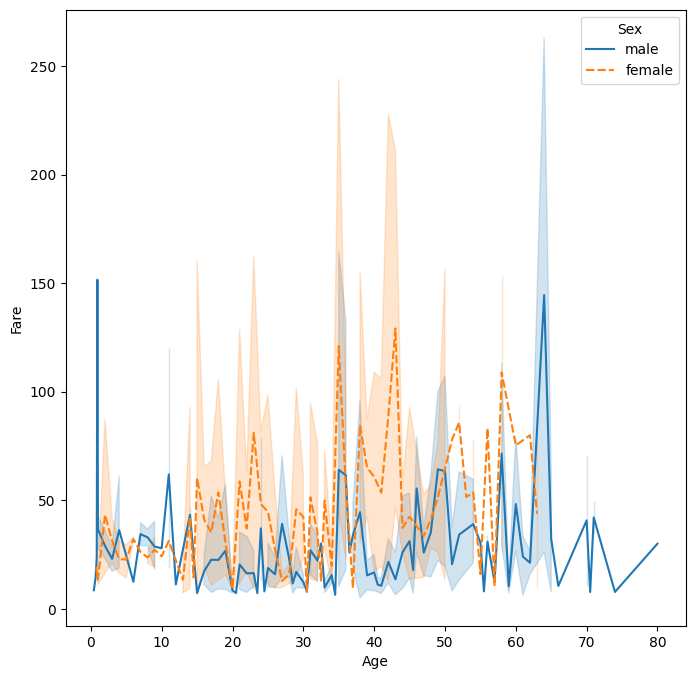

In [47]:
plt.figure(figsize=(8,8))
sns.lineplot(x="Age", y="Fare", hue="Sex", style="Sex", data=df)
plt.show()

[Go back to the Table of Contents](#table_of_contents)
** **
<a id = "features"></a>
## 4. Categorical Plot
When one or both the variables under study are categorical, we use plots like `striplot(), swarmplot(), etc,`. Seaborn provides interface to do so.
<a id = "barplot"></a>
### 4.1. barplot
***The `barplot()` shows the relation between a categorical variable and a continuous variable.*** The data is represented in rectangular bars where the length the bar represents the proportion of the data in that category.
**Bar plot** represents the estimate of ***central tendency.***

**Note:** don't confuse **Bar plot** and **Histogram**. Please back to `2.1. distplot` section to see the difference.


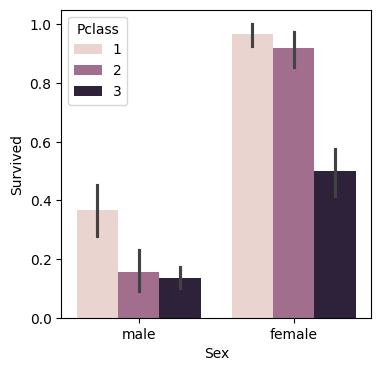

In [51]:
plt.figure(figsize=(4,4))
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df)
plt.show()

**As we can see, More women survived than men.**
<a id = "stripplot"></a>
### 4.2. stripplot
`stripplot()` is used when one of the variable under study is categorical. It represents the data in sorted order along any one of the axis.

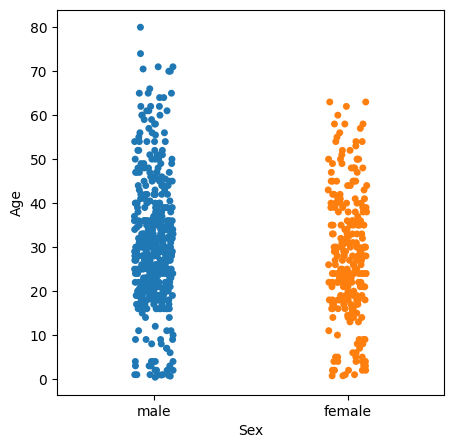

In [54]:
plt.figure(figsize=(5,5))
sns.stripplot(x="Sex", y="Age",hue='Sex', data=df)
plt.show()

To avoid the overlapping of the points, we can use the `jitter` to add some random noise to the data. This parameter will adjust the positions along the categorical axis. But Another option which can be used as an alternate to `‘Jitter’` is function `swarmplot()`.

<a id = "swarmplot"></a>
### 4.3. swarmplot
This function positions each point of scatter plot on the categorical axis and thereby avoids overlapping points:

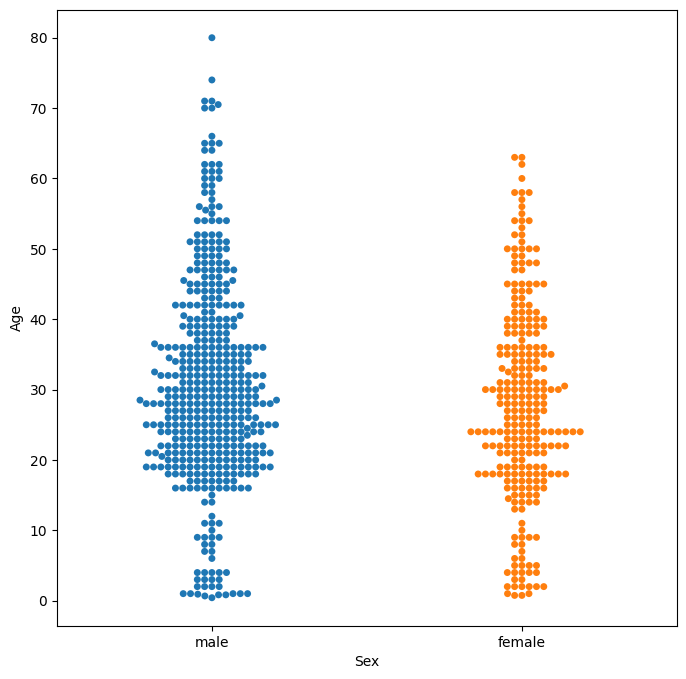

In [55]:
plt.figure(figsize=(8,8))
sns.swarmplot(x="Sex", y="Age",hue='Sex', data=df)
plt.show()

**We can said that more passengers are approximally between 18 and 40 years old.**
<a id = "boxplot"></a>
### 4.4. boxplot
**Boxplot** is a convenient way to visualize the distribution of data through their quartiles. Box plots usually have vertical lines extending from the boxes which are termed as **whiskers**. These whiskers indicate variability outside the upper and lower quartiles, hence Box Plots are also termed as **box-and-whisker plot** and **box-and-whisker diagram**. Any Outliers in the data are plotted as individual points.


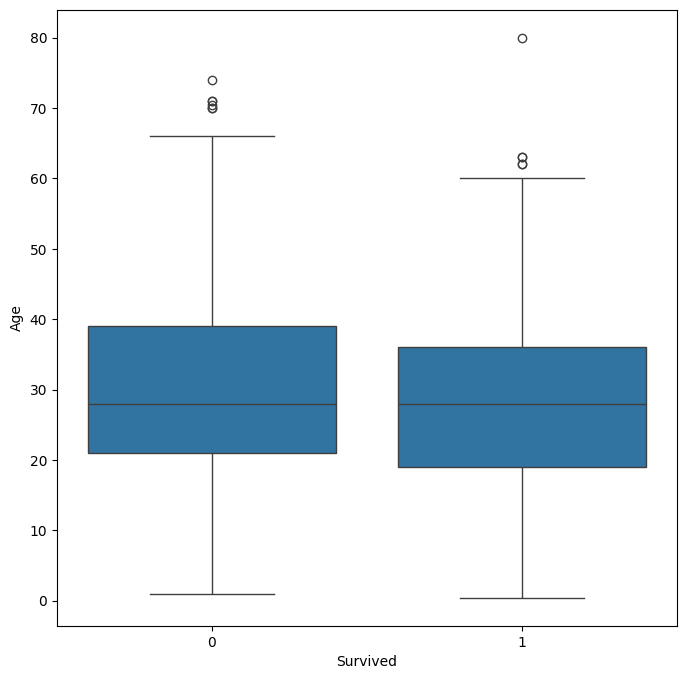

In [56]:
plt.figure(figsize=(8,8))
sns.boxplot(x="Survived", y="Age", data=df)
plt.show()

**We have some outliers for passengers survery through their age.**
<a id = "violinplot"></a>
### 4.5. violinplot
**Violin Plots** are a combination of the **box plot** with the **kernel density estimates**. So, these plots are easier to analyze and understand the distribution of the data.

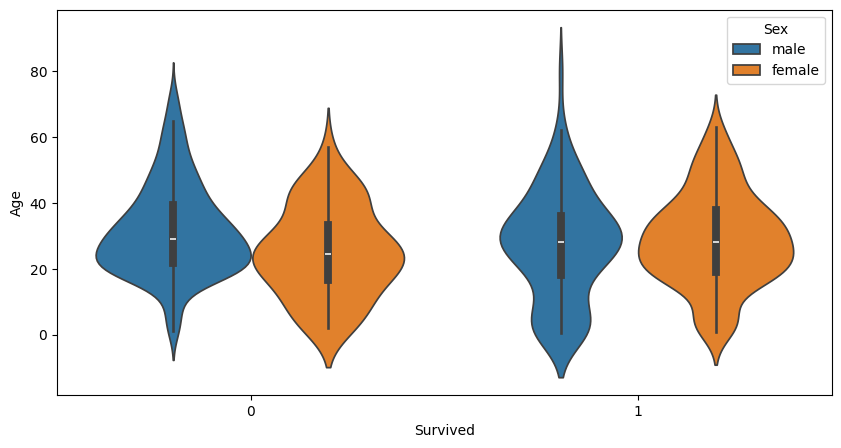

In [57]:
sns.violinplot(x="Survived", y="Age", hue='Sex', data=df)
plt.show()

The quartile and whisker values from the boxplot are shown inside the violin. As the violin plot uses KDE, the wider portion of violin indicates the higher density and narrow region represents relatively lower density. The Inter-Quartile range in boxplot and higher density portion in kde fall in the same region of each category of violin plot.

<a id = "countplot"></a>
### 4.6. countplot
A special case in **barplot** is to show the no of observations in each category rather than computing a statistic for a second variable. For this, we use `countplot()`.


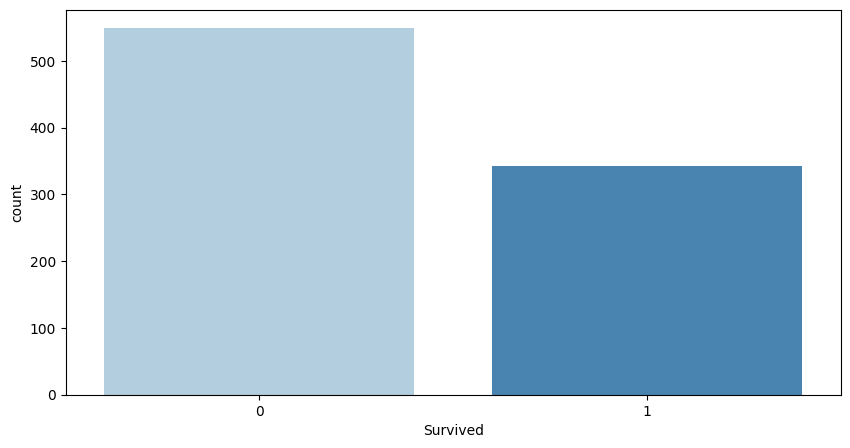

In [58]:
sns.countplot(x="Survived", data=df, palette="Blues");
plt.show()

**We can see the average number of survivals of male and female in each class. From the plot we can understand that more number of females survived than males. In both males and females more number of survivals are from first
class.**



** **
<a id = "Matrix"></a>
## 6. Matrix plots

<a id = "heatmap"></a>
### 6.1. heatmap

Visualizing data with **heatmaps** is a great way to do exploratory data analysis, when you have a data set with multiple variables. Heatmaps can reveal general pattern in the dataset, instantly. And it is very easy to make beautiful heatmaps with Seaborn library in Python.

Now let's plot the correlation matrix of our data with a heatmap.[link text](https://)

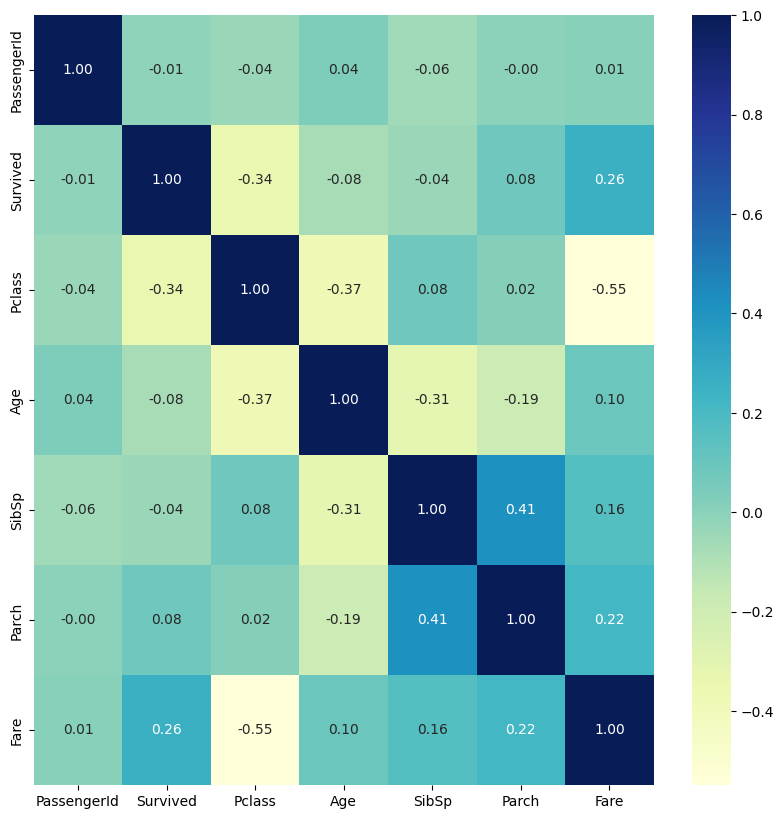

In [59]:
plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()

**We note that correlations beteewn variables are weak.**


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Missing Data**  
From the entry totals above, there appears to be missing data.  A heatmap will help better visualize what features as missing the most information.

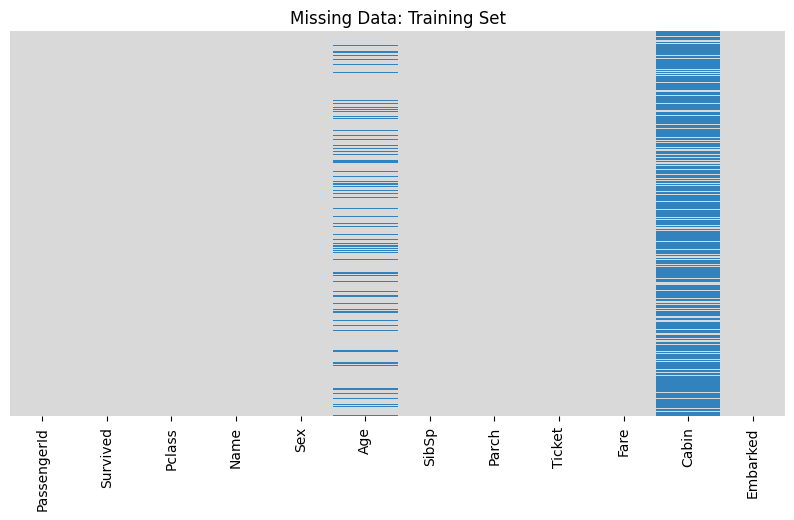

In [61]:
# Heatmap
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

The 'Age' variable is missing roughly 20% of its data. This proportion is likely small enough for reasonable replacements using some form of imputation as well (using the knowledge of the other columns to fill in reasonable values).
However, too much data from the 'Cabin' column is missing to do anything useful with it at a basic level. This column may need to be dropped from the data set altogether or change to another feature such as 'Cabin Known: 1 or 0'.  

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However, we can be smarter about this and check the average age by passenger class.


# 4. Implement an instance of the ColumnTransformer clas.

 Initialize a ColumnTransformer that will apply a OneHotEncoder to the categorical features. The remainder='passthrough' argument ensures that the non-transformed features are not discarded.

In [28]:
# Implement an instance of the ColumnTransformer class
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_features)
    ], remainder='passthrough')


In [29]:
# Apply the fit_transform method on the instance of ColumnTransformer
X = ct.fit_transform(df)
print(X)

[[0.0 1.0 0.0 ... 'A/5 21171' 7.25 nan]
 [1.0 0.0 1.0 ... 'PC 17599' 71.2833 'C85']
 [1.0 0.0 0.0 ... 'STON/O2. 3101282' 7.925 nan]
 ...
 [1.0 0.0 0.0 ... 'W./C. 6607' 23.45 nan]
 [0.0 1.0 1.0 ... '111369' 30.0 'C148']
 [0.0 1.0 0.0 ... '370376' 7.75 nan]]


6. Convert the output into a NumPy array. Convert the output to a NumPy array: The output of the ColumnTransformer is a sparse matrix - convert this to a dense NumPy array for easier manipulation.

In [30]:
# Convert the output into a NumPy array
X = np.array(X)

Use LabelEncoder to encode binary categorical data. The 'Survived' feature is our dependent variable. Since it is a binary categorical feature, we use LabelEncoder to transform it into numerical data.

In [31]:
# Use LabelEncoder to encode binary categorical data
le = LabelEncoder()
y = le.fit_transform(df['Survived'])
print(y)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 

In [32]:
# Print the updated matrix of features and the dependent variable vector
print("Updated matrix of features: \n", X)
print("Updated dependent variable vector: \n", y)


Updated matrix of features: 
 [[0.0 1.0 0.0 ... 'A/5 21171' 7.25 nan]
 [1.0 0.0 1.0 ... 'PC 17599' 71.2833 'C85']
 [1.0 0.0 0.0 ... 'STON/O2. 3101282' 7.925 nan]
 ...
 [1.0 0.0 0.0 ... 'W./C. 6607' 23.45 nan]
 [0.0 1.0 1.0 ... '111369' 30.0 'C148']
 [0.0 1.0 0.0 ... '370376' 7.75 nan]]
Updated dependent variable vector: 
 [0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 